In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Loading & Cleaning Data

In [2]:
#read csv file

data = pd.read_csv("IPL Matches 2008-2020.csv")
data.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [3]:
# drop columns with null value

data.drop('method',axis = 1,inplace = True)

In [4]:
#check null values in each column

data.isna().sum()

id                  0
city               13
date                0
player_of_match     4
venue               0
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              4
result              4
result_margin      17
eliminator          4
umpire1             0
umpire2             0
dtype: int64

In [5]:
#drop null values

data.dropna(inplace = True)

In [6]:
data.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

In [7]:
data.shape

(786, 16)

In [8]:
data.groupby('winner').size()

winner
Chennai Super Kings            103
Deccan Chargers                 29
Delhi Capitals                  17
Delhi Daredevils                65
Gujarat Lions                   13
Kings XI Punjab                 82
Kochi Tuskers Kerala             6
Kolkata Knight Riders           97
Mumbai Indians                 118
Pune Warriors                   12
Rajasthan Royals                79
Rising Pune Supergiant          10
Rising Pune Supergiants          5
Royal Challengers Bangalore     87
Sunrisers Hyderabad             63
dtype: int64

In [9]:
#replace Delhi Capitals with Delhi Daredevils

data.replace(to_replace="Delhi Capitals",
           value="Delhi Daredevils", inplace = True)

In [10]:
data.groupby('winner').size()

winner
Chennai Super Kings            103
Deccan Chargers                 29
Delhi Daredevils                82
Gujarat Lions                   13
Kings XI Punjab                 82
Kochi Tuskers Kerala             6
Kolkata Knight Riders           97
Mumbai Indians                 118
Pune Warriors                   12
Rajasthan Royals                79
Rising Pune Supergiant          10
Rising Pune Supergiants          5
Royal Challengers Bangalore     87
Sunrisers Hyderabad             63
dtype: int64

In [11]:
# Replace Rising Pune Supergiant with Rising Pune Supergiants 

data.replace(to_replace="Rising Pune Supergiant",
           value="Rising Pune Supergiants", inplace = True)

In [12]:
data.groupby('winner').size()

winner
Chennai Super Kings            103
Deccan Chargers                 29
Delhi Daredevils                82
Gujarat Lions                   13
Kings XI Punjab                 82
Kochi Tuskers Kerala             6
Kolkata Knight Riders           97
Mumbai Indians                 118
Pune Warriors                   12
Rajasthan Royals                79
Rising Pune Supergiants         15
Royal Challengers Bangalore     87
Sunrisers Hyderabad             63
dtype: int64

In [13]:
# Replace Rising Pune Supergiants with Pune Warriors

data.replace(to_replace="Rising Pune Supergiants",
           value="Pune Warriors", inplace = True)

In [14]:
data.groupby('winner').size()

winner
Chennai Super Kings            103
Deccan Chargers                 29
Delhi Daredevils                82
Gujarat Lions                   13
Kings XI Punjab                 82
Kochi Tuskers Kerala             6
Kolkata Knight Riders           97
Mumbai Indians                 118
Pune Warriors                   27
Rajasthan Royals                79
Royal Challengers Bangalore     87
Sunrisers Hyderabad             63
dtype: int64

In [15]:
# Replace Deccan Chargers  with Sunrisers Hyderabad 

data.replace(to_replace="Deccan Chargers",
           value="Sunrisers Hyderabad", inplace = True)

In [16]:
data.groupby('winner').size()

winner
Chennai Super Kings            103
Delhi Daredevils                82
Gujarat Lions                   13
Kings XI Punjab                 82
Kochi Tuskers Kerala             6
Kolkata Knight Riders           97
Mumbai Indians                 118
Pune Warriors                   27
Rajasthan Royals                79
Royal Challengers Bangalore     87
Sunrisers Hyderabad             92
dtype: int64

In [17]:
#replace multiple values 

data.replace({'venue' : { 'M Chinnaswamy Stadium' : 'M.Chinnaswamy Stadium ', 'Punjab Cricket Association IS Bindra Stadium, Mohali' : 'Punjab Cricket Association Stadium, Mohali'}},inplace  =True)

In [18]:
data.groupby('venue').size()

venue
Barabati Stadium                                        7
Brabourne Stadium                                      11
Buffalo Park                                            3
De Beers Diamond Oval                                   3
Dr DY Patil Sports Academy                             17
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    13
Dubai International Cricket Stadium                    23
Eden Gardens                                           77
Feroz Shah Kotla                                       72
Green Park                                              4
Himachal Pradesh Cricket Association Stadium            9
Holkar Cricket Stadium                                  9
JSCA International Stadium Complex                      7
Kingsmead                                              15
M.Chinnaswamy Stadium                                  14
M.Chinnaswamy Stadium                                  62
MA Chidambaram Stadium, Chepauk                        56
Maharash

In [19]:
data.groupby('player_of_match').size().sort_values(ascending=False)

player_of_match
CH Gayle          22
AB de Villiers    22
RG Sharma         18
MS Dhoni          17
DA Warner         17
                  ..
KMA Paul           1
KK Cooper          1
KK Ahmed           1
K Rabada           1
Z Khan             1
Length: 232, dtype: int64

In [20]:
# Has toss winning helped in match winning

ss = data['toss_winner'] == data['winner']
ss.groupby(ss).size()

False    378
True     408
dtype: int64

# Analytics on Data

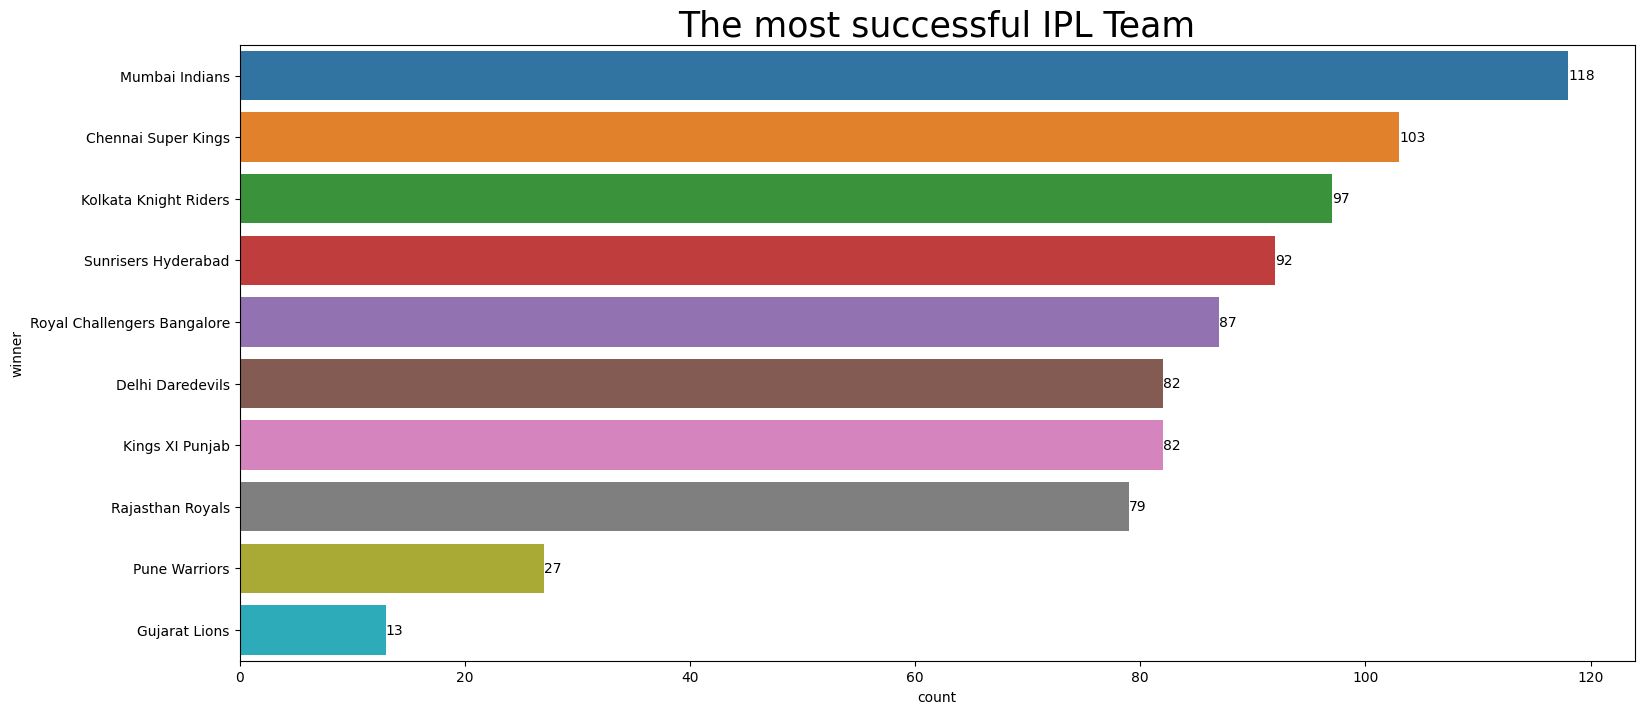

In [ ]:
plt.figure(figsize = (18,8))
plt.title('The Most Successful IPL Team',fontsize = 25)
ax = sns.countplot(y='winner',
              data = data,
              order = data['winner'].value_counts().head(10).index)

for bars in ax.containers:
    ax.bar_label(bars)


Above graph shows the team with most wins, with Mumbai Indians at top and so on

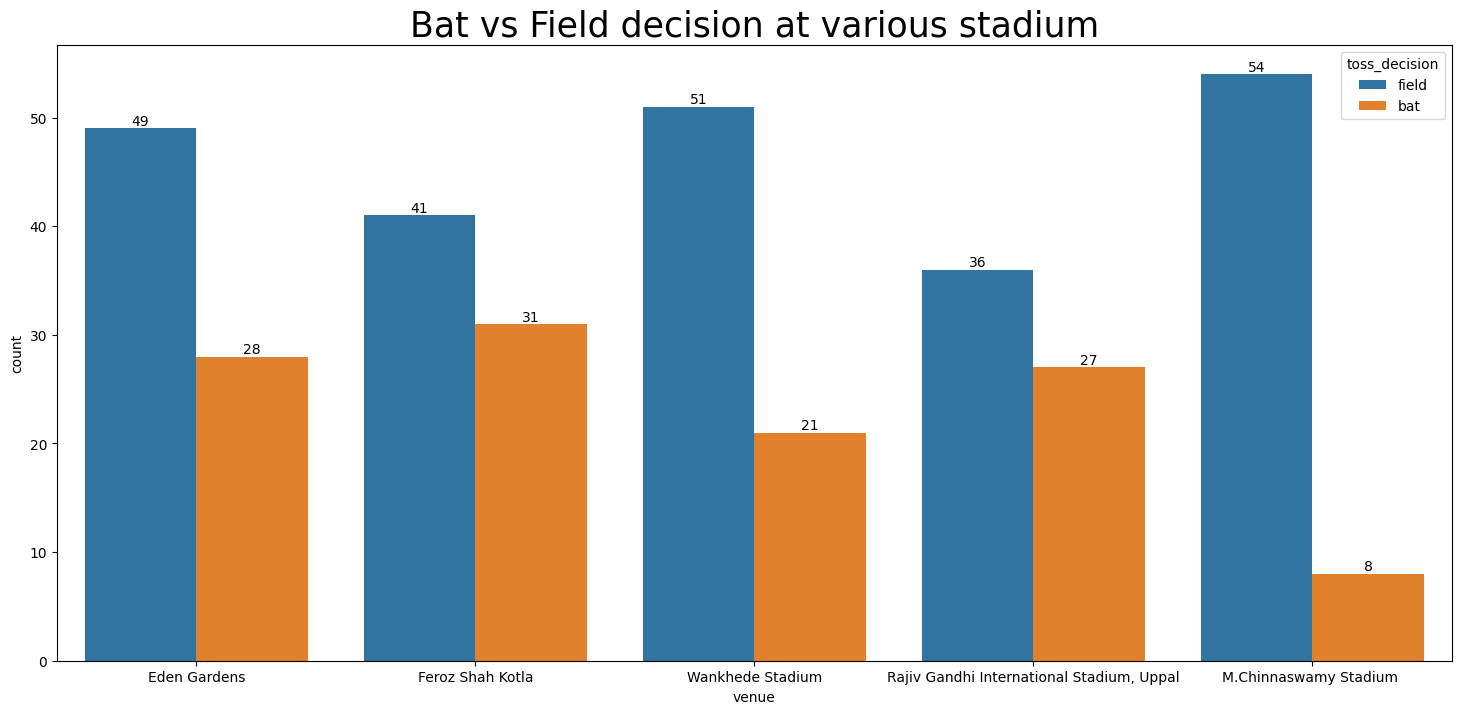

In [25]:
plt.figure(figsize = (18,8))
plt.title('Bat vs Field decision at various stadium',fontsize = 25)
ax = sns.countplot(x = 'venue',
              data = data,
              order = data['venue'].value_counts().head(5).index,hue = 'toss_decision')

for bars in ax.containers:
    ax.bar_label(bars)

Above graph shows the comparision between toss decision on the top 5 most matchs played stadium

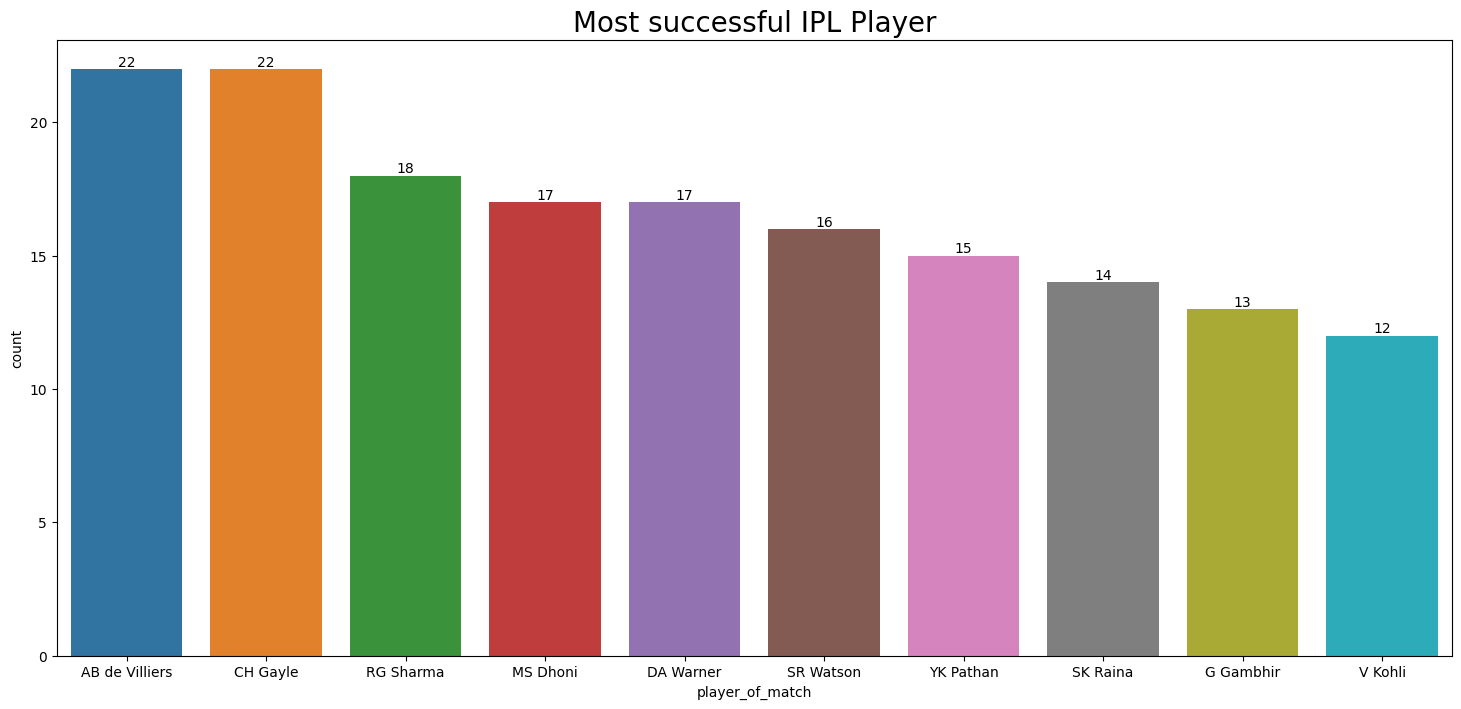

In [26]:
plt.figure(figsize = (18,8))
plt.title("Most successful IPL Player",fontsize = 20)
ax = sns.countplot(x = 'player_of_match',
              data = data,
              order = data['player_of_match'].value_counts().head(10).index)

for bars in ax.containers:
    ax.bar_label(bars)

The above graph shows the players who have become player of the match most times